In [1]:
# import the libraries :
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
df=pd.read_csv('penguinedata.csv')

In [3]:
df.head()

,studyName,Sample Number,Species,Island,Individual ID,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Torgersen,N1A1,11/11/2007,39.1,18.7,181,.,MALE,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Torgersen,N1A2,11/11/2007,39.5,17.4,186,3800,FEMALE,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Torgersen,N2A1,11/16/2007,40.3,18.0,.,3250,FEMALE,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Torgersen,N2A2,11/16/2007,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Torgersen,N3A1,11/16/2007,36.7,19.3,193,3450,FEMALE,NaN


In [4]:
# species = dependent variables
# other = independent

In [5]:
df.shape

(344, 12)

In [6]:
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm)
count,344.000000,342.000000,342.000000
mean,63.151163,43.921930,17.151170
std,40.430199,5.459584,1.974793
min,1.000000,32.100000,13.100000
25%,29.000000,39.225000,15.600000
50%,58.000000,44.450000,17.300000
75%,95.250000,48.500000,18.700000
max,152.000000,59.600000,21.500000


In [7]:
# preprocessing EDA

In [8]:
df.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Island                   0
Individual ID            0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Comments               318
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Island               344 non-null    object 
 4   Individual ID        344 non-null    object 
 5   Date Egg             344 non-null    object 
 6   Culmen Length (mm)   342 non-null    float64
 7   Culmen Depth (mm)    342 non-null    float64
 8   Flipper Length (mm)  342 non-null    object 
 9   Body Mass (g)        342 non-null    object 
 10  Sex                  334 non-null    object 
 11  Comments             26 non-null     object 
dtypes: float64(2), int64(1), object(9)
memory usage: 32.4+ KB


In [10]:
df['Species'].value_counts()

Species
Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: count, dtype: int64

In [11]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Island', 'Individual ID',
       'Date Egg', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Comments'],
      dtype='object')

In [12]:
df1=df.copy()

In [13]:
#drop the unessary columns
df.drop(['studyName', 'Sample Number', 'Individual ID', 'Date Egg', 'Comments'],axis=1,inplace=True)

In [14]:
df.isnull().sum()

Species                 0
Island                  0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  342 non-null    object 
 5   Body Mass (g)        342 non-null    object 
 6   Sex                  334 non-null    object 
dtypes: float64(2), object(5)
memory usage: 18.9+ KB


In [16]:
df['Flipper Length (mm)'].value_counts()

Flipper Length (mm)
190    22
187    16
195    16
193    15
210    14
191    13
215    12
196    10
197    10
185     9
220     8
198     8
208     8
216     8
212     7
186     7
230     7
192     7
181     7
189     7
184     7
188     6
222     6
201     6
213     6
217     6
199     6
214     6
209     5
219     5
218     5
221     5
203     5
180     5
194     5
178     4
200     4
228     4
225     4
202     4
205     3
224     3
182     3
223     2
183     2
229     2
211     2
207     2
231     1
176     1
174     1
.       1
206     1
172     1
179     1
226     1
Name: count, dtype: int64

In [17]:
for i in ['Flipper Length (mm)','Body Mass (g)','Sex']:
    print(i,df[i].unique())
    print('###############################################################################')

Flipper Length (mm) ['181' '186' '.' nan '193' '190' '195' '180' '182' '191' '198' '185' '197'
 '184' '194' '174' '189' '187' '183' '172' '178' '188' '196' '179' '200'
 '192' '202' '205' '208' '203' '199' '176' '210' '201' '212' '206' '207'
 '211' '230' '218' '215' '219' '209' '214' '216' '213' '217' '221' '222'
 '220' '225' '224' '231' '229' '223' '228' '226']
###############################################################################
Body Mass (g) ['.' '3800' '3250' nan '3450' '3650' '3625' '4675' '3475' '4250' '3300'
 '3700' '3200' '4400' '4500' '3325' '4200' '3400' '3600' '3950' '3550'
 '3150' '3900' '4150' '4650' '3100' '3000' '4600' '3425' '2975' '3500'
 '4300' '4050' '2900' '2850' '3750' '3350' '4100' '3050' '4450' '4000'
 '4700' '4350' '3725' '4725' '3075' '2925' '3175' '4775' '3825' '4275'
 '4075' '3775' '3875' '3275' '4475' '3975' '3525' '3575' '4550' '3850'
 '4800' '2700' '3675' '5700' '5400' '5200' '5150' '5550' '5850' '6300'
 '5350' '5000' '5050' '5100' '5650' '5250' '

In [18]:
#Flipper Length (mm)
df['Flipper Length (mm)']=np.where(df['Flipper Length (mm)']=='.',np.nan,df['Flipper Length (mm)'])
df['Body Mass (g)']=np.where(df['Body Mass (g)']=='.',np.nan,df['Body Mass (g)'])
df['Sex']=np.where(df['Sex']=='.',np.nan,df['Sex'])

In [19]:
for i in ['Flipper Length (mm)','Body Mass (g)','Sex']:
    print(i,df[i].unique())
    print('###############################################################################')

Flipper Length (mm) ['181' '186' nan '193' '190' '195' '180' '182' '191' '198' '185' '197'
 '184' '194' '174' '189' '187' '183' '172' '178' '188' '196' '179' '200'
 '192' '202' '205' '208' '203' '199' '176' '210' '201' '212' '206' '207'
 '211' '230' '218' '215' '219' '209' '214' '216' '213' '217' '221' '222'
 '220' '225' '224' '231' '229' '223' '228' '226']
###############################################################################
Body Mass (g) [nan '3800' '3250' '3450' '3650' '3625' '4675' '3475' '4250' '3300' '3700'
 '3200' '4400' '4500' '3325' '4200' '3400' '3600' '3950' '3550' '3150'
 '3900' '4150' '4650' '3100' '3000' '4600' '3425' '2975' '3500' '4300'
 '4050' '2900' '2850' '3750' '3350' '4100' '3050' '4450' '4000' '4700'
 '4350' '3725' '4725' '3075' '2925' '3175' '4775' '3825' '4275' '4075'
 '3775' '3875' '3275' '4475' '3975' '3525' '3575' '4550' '3850' '4800'
 '2700' '3675' '5700' '5400' '5200' '5150' '5550' '5850' '6300' '5350'
 '5000' '5050' '5100' '5650' '5250' '6050' '4

In [20]:
df.isnull().sum()

Species                 0
Island                  0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     3
Body Mass (g)           3
Sex                    11
dtype: int64

In [21]:
df['Sex'].value_counts()

Sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [22]:
df['Sex']=df['Sex'].fillna('MALE')

In [23]:
df.isnull().sum()

Species                0
Island                 0
Culmen Length (mm)     2
Culmen Depth (mm)      2
Flipper Length (mm)    3
Body Mass (g)          3
Sex                    0
dtype: int64

In [24]:
# changing the data types

In [25]:
df['Flipper Length (mm)']=df['Flipper Length (mm)'].astype('float64')
df['Body Mass (g)']=df['Body Mass (g)'].astype('float64')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  341 non-null    float64
 5   Body Mass (g)        341 non-null    float64
 6   Sex                  344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Culmen Length (mm)        Axes(0.125,0.53;0.352273x0.35)
Culmen Depth (mm)      Axes(0.547727,0.53;0.352273x0.35)
Flipper Length (mm)       Axes(0.125,0.11;0.352273x0.35)
Body Mass (g)          Axes(0.547727,0.11;0.352273x0.35)
dtype: object

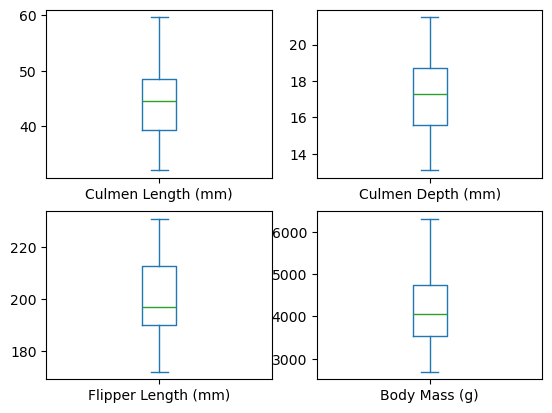

In [27]:
df.plot(kind='box',subplots=True,layout=(2,2))

In [28]:
# mean = not outlier and median = outlier 
# # filling null values with median for numerical values and mode for categorical values

In [29]:
lst=['Flipper Length (mm)','Body Mass (g)','Culmen Length (mm)','Culmen Depth (mm)' ]

In [30]:
for i in lst:
    df[i]=df[i].fillna(df[i].mean())

In [31]:
df.isnull().sum()

Species                0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
dtype: int64

In [32]:
lst=['Species','Island','Sex']
for i in lst:
    print(df[i].value_counts())
    print("**************")

Species
Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: count, dtype: int64
**************
Island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
**************
Sex
MALE      179
FEMALE    165
Name: count, dtype: int64
**************


In [33]:
##EDS

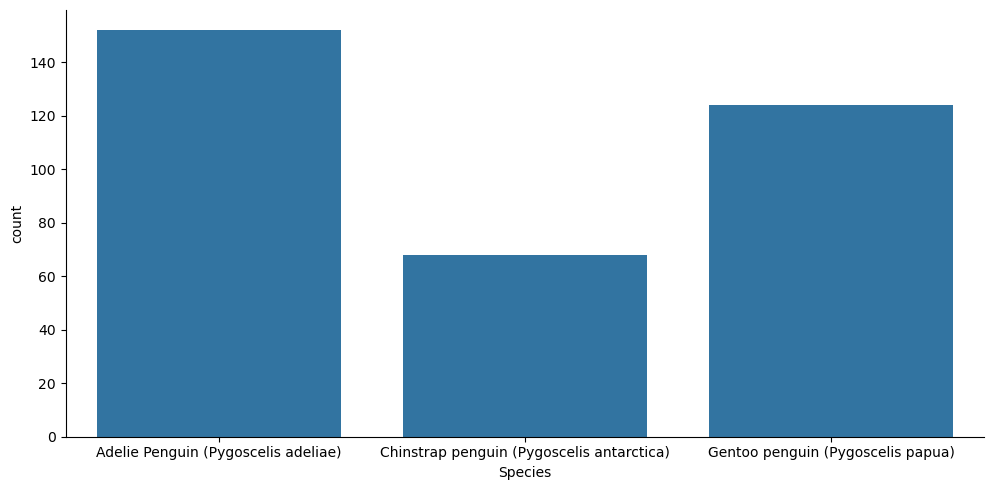

In [34]:
#sns.catplot(data=df,x='Species',kind='count')
sns.catplot(data=df,x='Species',kind='count',height=5,aspect=2)

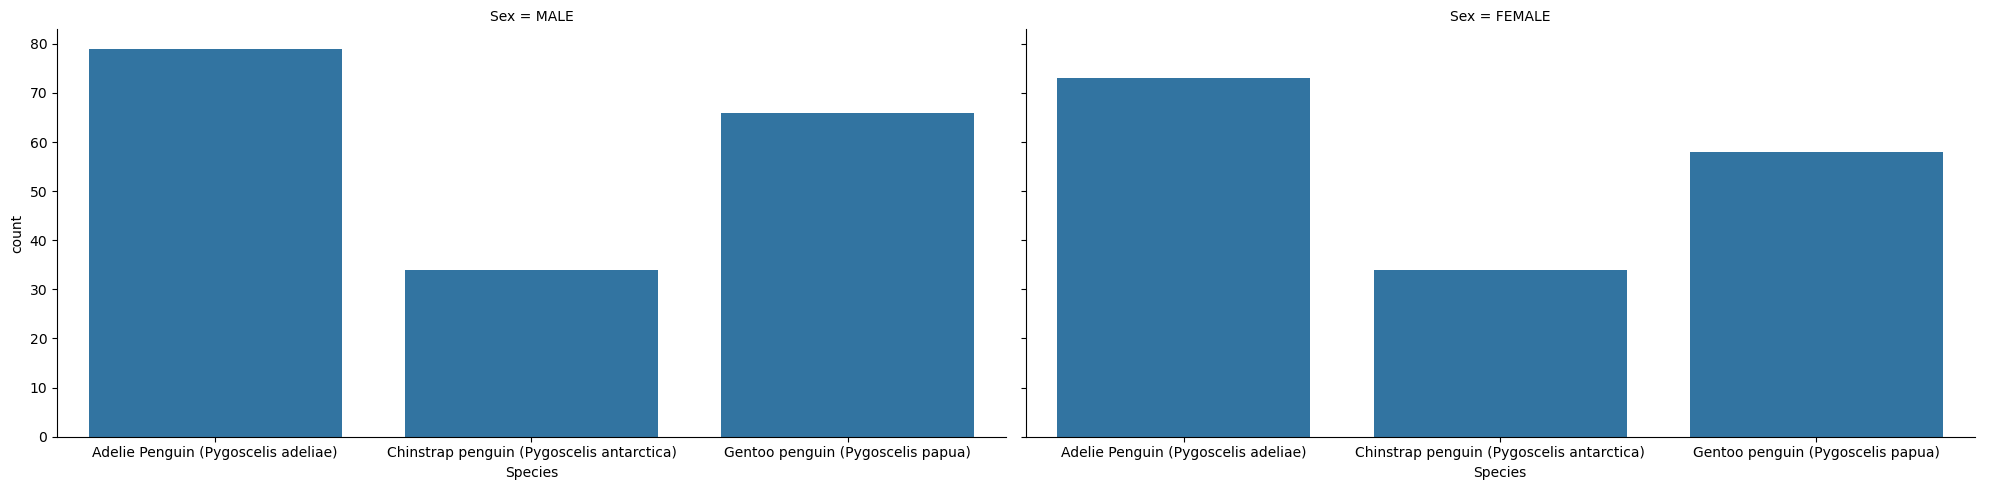

In [35]:
#sns.catplot(data=df,x='Species',kind='count')
#sns.catplot(data=df,x='Species',kind='count',height=5,aspect=2,hue='Sex')
sns.catplot(data=df,x='Species',kind='count',height=5,aspect=2,col='Sex')

In [36]:
df_is=df['Island'].value_counts()

<Axes: ylabel='count'>

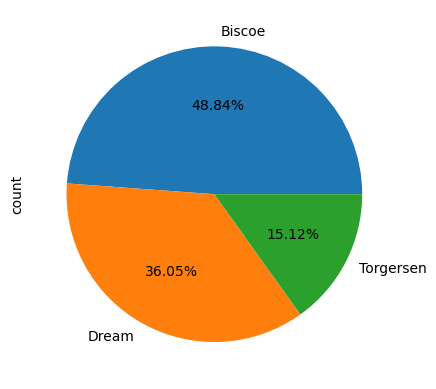

In [37]:
df_is.plot(kind='pie',autopct='%.2f%%')

In [38]:
df.columns

Index(['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex'],
      dtype='object')

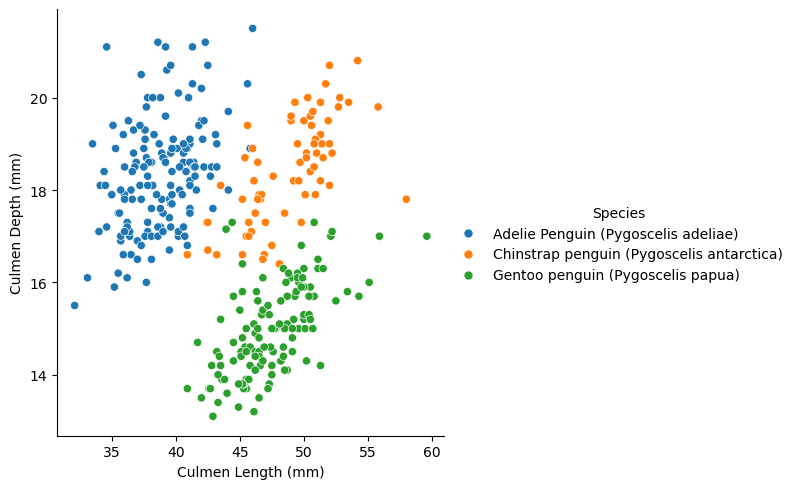

In [39]:
sns.relplot(data=df,x='Culmen Length (mm)',y='Culmen Depth (mm)',hue='Species')

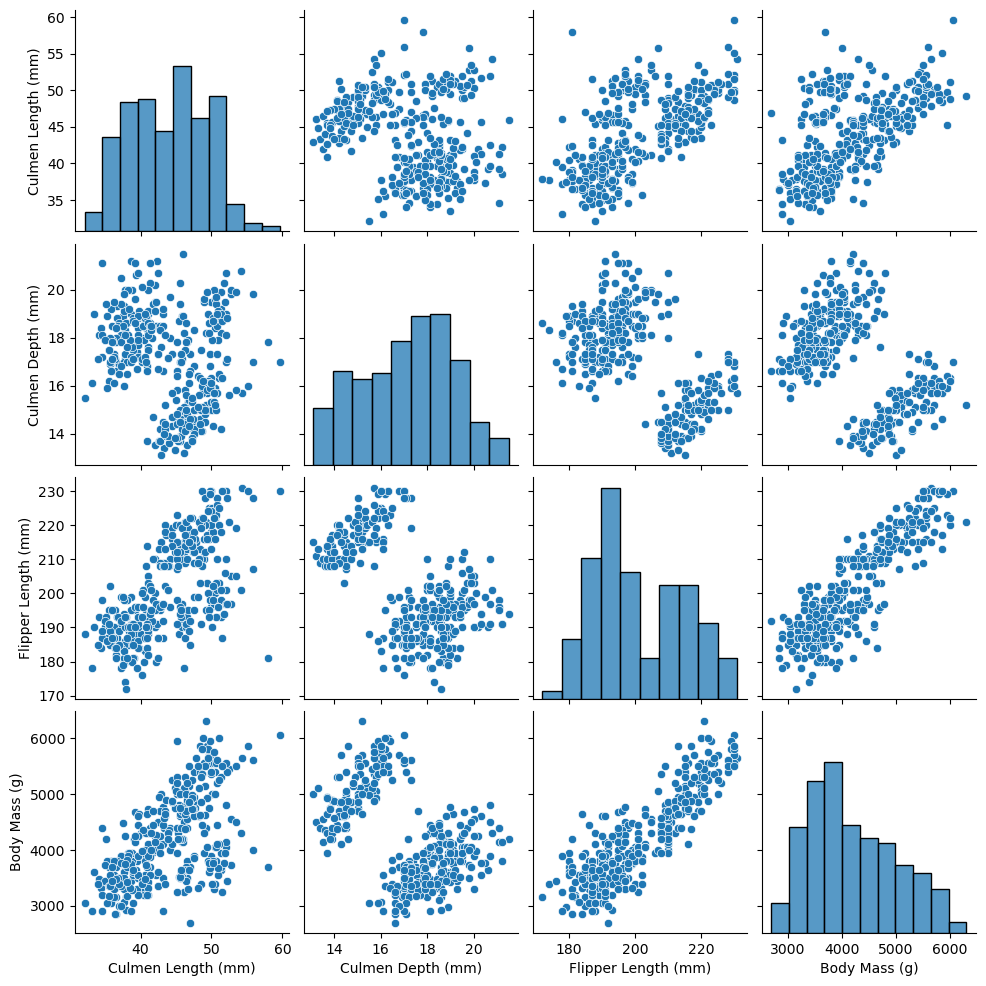

In [40]:
sns.pairplot(df)

In [41]:
#sns.heatmap(df.corr(),annot=True,cmap='bright')

In [42]:
# you can apply pandas profiling

In [43]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [44]:
pd.set_option('display.max_rows',None)

In [45]:
df

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,0,Torgersen,39.10000,18.70000,181.000000,4203.079179,MALE
1,0,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,0,Torgersen,40.30000,18.00000,200.932551,3250.000000,FEMALE
3,0,Torgersen,43.92193,17.15117,200.932551,4203.079179,MALE
4,0,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
5,0,Torgersen,39.30000,20.60000,190.000000,3650.000000,MALE
6,0,Torgersen,38.90000,17.80000,181.000000,3625.000000,FEMALE
7,0,Torgersen,39.20000,19.60000,195.000000,4675.000000,MALE
8,0,Torgersen,34.10000,18.10000,193.000000,3475.000000,MALE
9,0,Torgersen,42.00000,20.20000,190.000000,4250.000000,MALE


In [46]:
## one hot encoding for independent 
df=pd.get_dummies(data=df,columns=['Island','Sex'],dtype='int')

In [47]:
df

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Biscoe,Island_Dream,Island_Torgersen,Sex_FEMALE,Sex_MALE
0,0,39.10000,18.70000,181.000000,4203.079179,0,0,1,0,1
1,0,39.50000,17.40000,186.000000,3800.000000,0,0,1,1,0
2,0,40.30000,18.00000,200.932551,3250.000000,0,0,1,1,0
3,0,43.92193,17.15117,200.932551,4203.079179,0,0,1,0,1
4,0,36.70000,19.30000,193.000000,3450.000000,0,0,1,1,0
5,0,39.30000,20.60000,190.000000,3650.000000,0,0,1,0,1
6,0,38.90000,17.80000,181.000000,3625.000000,0,0,1,1,0
7,0,39.20000,19.60000,195.000000,4675.000000,0,0,1,0,1
8,0,34.10000,18.10000,193.000000,3475.000000,0,0,1,0,1
9,0,42.00000,20.20000,190.000000,4250.000000,0,0,1,0,1


In [48]:
df.columns

Index(['Species', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Island_Biscoe', 'Island_Dream',
       'Island_Torgersen', 'Sex_FEMALE', 'Sex_MALE'],
      dtype='object')

In [49]:
df.drop(['Island_Torgersen','Sex_MALE'],axis=1,inplace=True)

In [50]:
df.columns

Index(['Species', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Island_Biscoe', 'Island_Dream',
       'Sex_FEMALE'],
      dtype='object')

<Axes: >

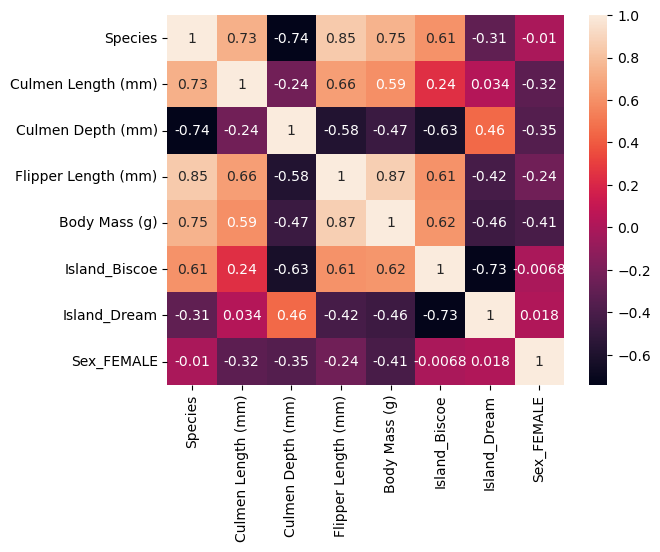

In [51]:
sns.heatmap(df.corr(),annot=True)

In [52]:
# build base model
# divide independent and dependent 

In [53]:
#X=df.drop(['Species'],axis-1,inplace=True)
X=df.iloc[:,1:]
y=df['Species']

In [54]:
X

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Biscoe,Island_Dream,Sex_FEMALE
0,39.10000,18.70000,181.000000,4203.079179,0,0,0
1,39.50000,17.40000,186.000000,3800.000000,0,0,1
2,40.30000,18.00000,200.932551,3250.000000,0,0,1
3,43.92193,17.15117,200.932551,4203.079179,0,0,0
4,36.70000,19.30000,193.000000,3450.000000,0,0,1
5,39.30000,20.60000,190.000000,3650.000000,0,0,0
6,38.90000,17.80000,181.000000,3625.000000,0,0,1
7,39.20000,19.60000,195.000000,4675.000000,0,0,0
8,34.10000,18.10000,193.000000,3475.000000,0,0,0
9,42.00000,20.20000,190.000000,4250.000000,0,0,0


In [55]:
y

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [56]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(X)

In [57]:
df_scaled=pd.DataFrame(x_scaled)

In [58]:
df_scaled

,0,1,2,3,4,5,6
0,-8.870812e-01,7.877425e-01,-1.424097e+00,1.139607e-15,-0.977008,-0.750757,-0.960098
1,-8.134940e-01,1.265563e-01,-1.066868e+00,-5.050628e-01,-0.977008,-0.750757,1.041561
2,-6.663195e-01,4.317192e-01,-2.030612e-15,-1.194219e+00,-0.977008,-0.750757,1.041561
3,-1.307172e-15,1.806927e-15,-2.030612e-15,1.139607e-15,-0.977008,-0.750757,-0.960098
4,-1.328605e+00,1.092905e+00,-5.667476e-01,-9.436168e-01,-0.977008,-0.750757,1.041561
5,-8.502876e-01,1.754092e+00,-7.810851e-01,-6.930145e-01,-0.977008,-0.750757,-0.960098
6,-9.238748e-01,3.299982e-01,-1.424097e+00,-7.243398e-01,-0.977008,-0.750757,1.041561
7,-8.686844e-01,1.245487e+00,-4.238560e-01,5.913222e-01,-0.977008,-0.750757,-0.960098
8,-1.806922e+00,4.825797e-01,-5.667476e-01,-9.122916e-01,-0.977008,-0.750757,-0.960098
9,-3.535738e-01,1.550650e+00,-7.810851e-01,5.879233e-02,-0.977008,-0.750757,-0.960098


In [59]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=101)

In [60]:
#model building 

In [61]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [62]:
y_pred=dtree.predict(x_test)

In [63]:
#Training accuracy
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [64]:
#
y_pred_train=dtree.predict(x_train)
print("Training accuracy:",accuracy_score(y_train,y_pred_train))

Training accuracy: 1.0


In [65]:
#testing accuracy
y_pred_test=dtree.predict(x_test)
print("Testing accuracy:",accuracy_score(y_test,y_pred_test))

Testing accuracy: 1.0


In [66]:
confusion_matrix(y_test,y_pred_test)

array([[31,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 21]], dtype=int64)

In [67]:
# plotting of confusion matrx

In [68]:
dtree.feature_importances_

array([0.34395507, 0.04164294, 0.55022416, 0.        , 0.00575627,
       0.02507175, 0.03334981])

In [69]:
df_importance=pd.DataFrame()
df_importance['Column_name']=X.columns
df_importance['importance']=dtree.feature_importances_

In [70]:
df_importance

,Column_name,importance
0,Culmen Length (mm),0.343955
1,Culmen Depth (mm),0.041643
2,Flipper Length (mm),0.550224
3,Body Mass (g),0.000000
4,Island_Biscoe,0.005756
5,Island_Dream,0.025072
6,Sex_FEMALE,0.033350


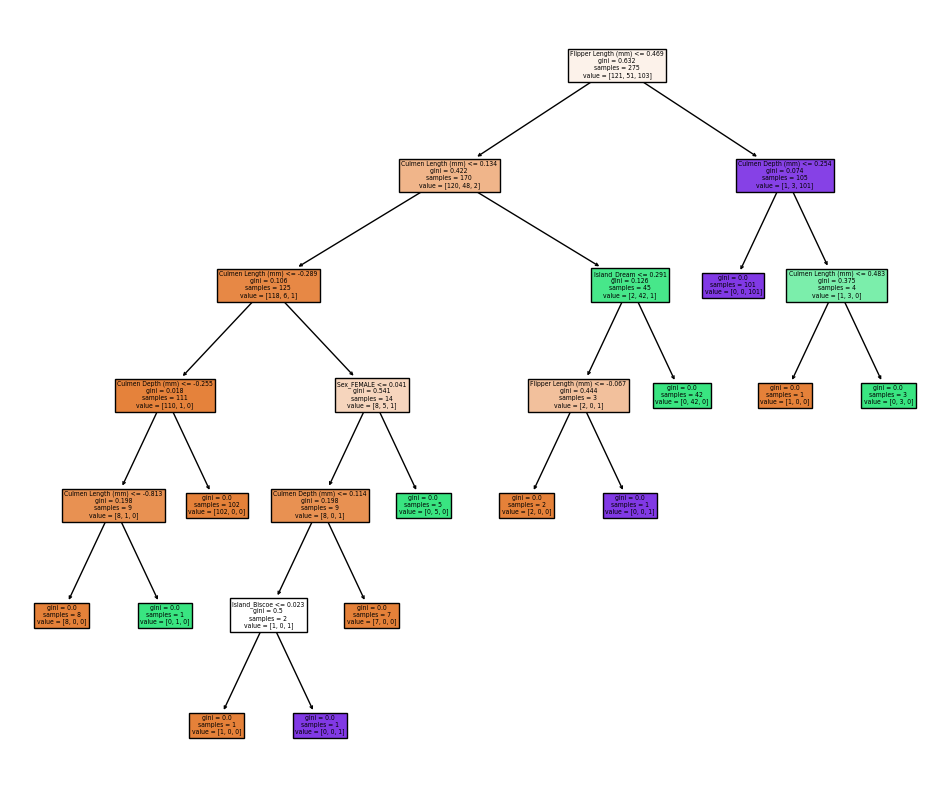

In [71]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,10))
plot_tree(dtree,filled=True,feature_names=X.columns)
plt.show()

In [72]:
dtree2=DecisionTreeClassifier(criterion='entropy')
dtree2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [73]:
y_pred_train_entropy=dtree.predict(x_train)
print('Training Accuracy:',accuracy_score(y_train,y_pred_train_entropy))

Training Accuracy: 1.0


In [74]:
y_pred_test_entropy=dtree.predict(x_test)
print('Testing Accuracy:',accuracy_score(y_test,y_pred_test_entropy))

Testing Accuracy: 1.0


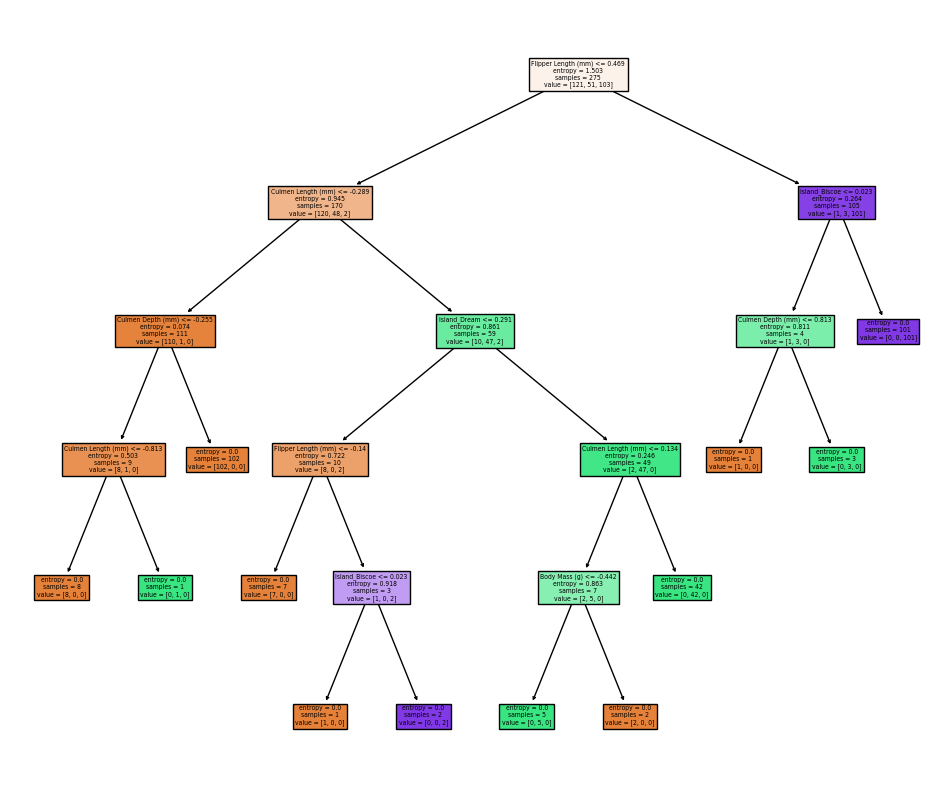

In [75]:
# Plotting a tree using entropy
from sklearn.tree import plot_tree
plt.figure(figsize=(12,10))
plot_tree(dtree2,filled=True,feature_names=X.columns)
plt.show()


In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        21

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



In [77]:
# Bagging classifier and Random forest

In [78]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [79]:
bag=BaggingClassifier()
bag.fit(x_train,y_train)
y_pred=bag.predict(x_test)

In [80]:
#traing accuracy
accuracy_score(y_train,bag.predict(x_train))

1.0

In [81]:
#testing accuracy
accuracy_score(y_test,bag.predict(x_test))

0.9855072463768116

In [82]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [83]:
#traing accuracy
accuracy_score(y_train,rf.predict(x_train))

1.0

In [84]:
#testing accuracy
accuracy_score(y_test,rf.predict(x_test))

1.0

In [85]:
### try to find AUC & ROC= Recieving operator characteristic

In [86]:
# hyper parameter tuning 

In [87]:
param={'criterion':['gini','entropy','logloss'],\
       'max_depth':[5,6,7,9,10],\
       'min_samples_split':[3,4,5,6,7],\
       'min_samples_leaf':[2,3,4,5],\
        'max_features':['sqrt','log2','auto']}

In [88]:
# grid  Search CV
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier()
cv=GridSearchCV(rf,param,cv=5,scoring='accuracy') # 5= fold validation 

In [89]:
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'logloss'],
                         'max_depth': [5, 6, 7, 9, 10],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [3, 4, 5, 6, 7]},
             scoring='accuracy')

In [90]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4}

In [91]:
y_pred_cv=cv.predict(x_test)


In [92]:
accuracy_score(y_test,y_pred_cv)

1.0

In [93]:
# Boosting techniques 

In [94]:
from sklearn.ensemble import AdaBoostClassifier
Ada=AdaBoostClassifier()
Ada.fit(x_train,y_train)
y_pre=Ada.predict(x_test)

In [95]:
#traing accuracy
accuracy_score(y_train,Ada.predict(x_train))

0.9345454545454546

In [96]:
#testing accuracy
accuracy_score(y_test,Ada.predict(x_test))

0.8840579710144928

In [97]:
# Gradient Boosting

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier()
grad.fit(x_train,y_train)
y_pre=grad.predict(x_test)

In [99]:
#traing accuracy
accuracy_score(y_train,grad.predict(x_train))

1.0

In [100]:
#testing accuracy
accuracy_score(y_test,grad.predict(x_test))

1.0

In [101]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [102]:
from sklearn.ensemble import XGBClassifier
xg=XGBClassifier()
xg.fit(x_train,y_train)
y_pred_xg=xg.predict(x_test)

ImportError: cannot import name 'XGBClassifier' from 'sklearn.ensemble' (C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\__init__.py)

In [ ]:
#traing accuracy
accuracy_score(y_train,xg.predict(x_train))

In [ ]:
#testing accuracy
accuracy_score(y_test,xg.predict(x_test))